In [1]:
import numpy as np
import pandas as pd
from functools import reduce

import torch
import os
import sys

import matplotlib.pyplot as plt
import matplotlib

from scipy.integrate import solve_ivp
from scipy.io import loadmat
from pysindy.utils import lotka

import pysindy as ps

import epde.interface.interface as epde_alg
from epde.interface.prepared_tokens import TrigonometricTokens, CacheStoredTokens
from epde.interface.solver_integration import BoundaryConditions, BOPElement

import matplotlib as mpl
mpl.rc('text', usetex=False)

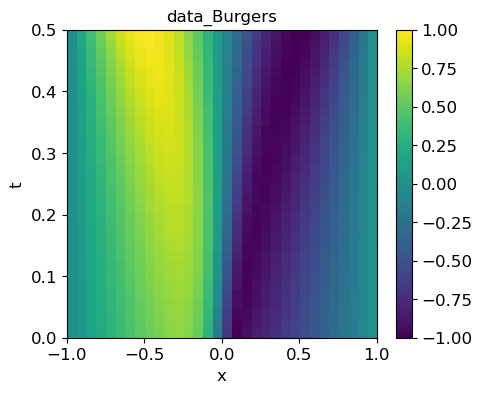

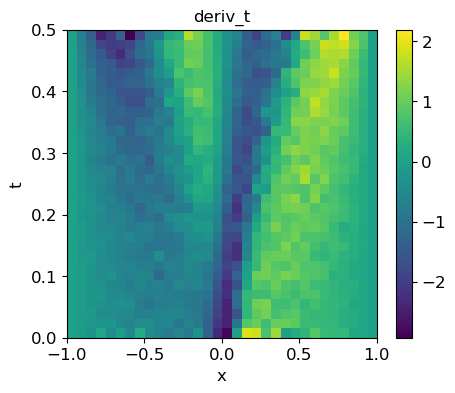

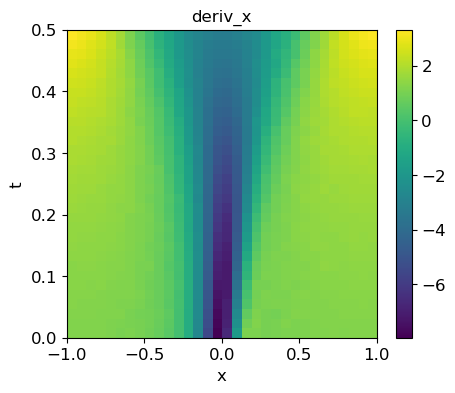

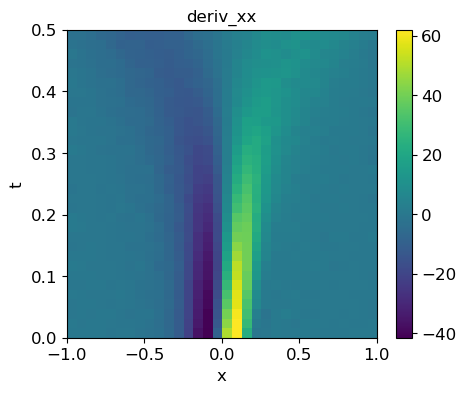

In [ ]:
x = np.linspace(-1, 1, 32)  
t = np.linspace(0, 0.5, 32)
data = np.load('data_Burgers_noise0.01.npy')  
deriv_x = np.load('Burgers_Gradient_x_noise0.01.npy')
deriv_xx = np.load('Burgers_Gradient_xx_noise0.01.npy')
deriv_t = np.load('Burgers_Gradient_t_noise0.01.npy')

dt = t[1] - t[0]
dx = x[1] - x[0]

plt.figure(figsize=(5, 4))
plt.imshow(data, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('data_Burgers')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(deriv_t, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('deriv_t')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(deriv_x, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('deriv_x')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

plt.figure(figsize=(5, 4))
plt.imshow(deriv_xx, aspect='auto', extent=[np.min(x), np.max(x),np.min(t), np.max(t)], cmap='viridis')
plt.colorbar()
plt.title('deriv_xx')
plt.xlabel('x')
plt.ylabel('t')
plt.show()

In [12]:
x = np.linspace(-1, 1, 32)  
t = np.linspace(0, 0.5, 32)
u = np.load('data_Burgers_noise0.01.npy')  
u_x = np.load('Burgers_Adaptive_x_noise0.01.npy')
u_xx = np.load('Burgers_Adaptive_xx_noise0.01.npy')
u_t = np.load('Burgers_Adaptive_t_noise0.01.npy')

dt = t[1] - t[0]
dx = x[1] - x[0]

X = np.stack([u, u_x, u_xx], axis=-1)  # (32, 32, 3)
X = X.reshape(-1, 3)  # (1024, 3)
X_dot = u_t.reshape(-1, 1)  # (1024, 1)

library_functions = [lambda x: x, lambda x, y: x * y]  # Линейные и билинейные члены
library_function_names = [lambda x: x, lambda x, y: f"{x}*{y}"]

optimizer = ps.STLSQ(threshold=10, alpha=1e-5, normalize_columns=True)
ensemble_optimizer = ps.EnsembleOptimizer(
    optimizer,
    bagging=True,
    n_models=10,
    n_subset=np.product(u_t.shape[:-1]) // 3,
)

#CustomLibrary вместо PDELibrary
custom_lib = ps.CustomLibrary(
    library_functions=library_functions,
    function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_lib, optimizer=optimizer)
model.fit(X, x_dot=X_dot)
model.print()

(x0)' = 0.000


c:\Anaconda3\Lib\site-packages\pysindy\optimizers\stlsq.py:191: UserWarning: Sparsity parameter is too big (10) and eliminated all coefficients
  warnings.warn(


In [13]:
x = np.linspace(-1, 1, 32)  
t = np.linspace(0, 0.5, 32)
u = np.load('data_Burgers_noise0.01.npy')  
u_x = np.load('Burgers_Gradient_x_noise0.01.npy')
u_xx = np.load('Burgers_Gradient_xx_noise0.01.npy')
u_t = np.load('Burgers_Gradient_t_noise0.01.npy')

dt = t[1] - t[0]
dx = x[1] - x[0]

X = np.stack([u, u_x, u_xx], axis=-1)  # (32, 32, 3)
X = X.reshape(-1, 3)  # (1024, 3)
X_dot = u_t.reshape(-1, 1)  # (1024, 1)

library_functions = [lambda x: x, lambda x, y: x * y]  # Линейные и билинейные члены
library_function_names = [lambda x: x, lambda x, y: f"{x}*{y}"]


#CustomLibrary вместо PDELibrary
custom_lib = ps.CustomLibrary(
    library_functions=library_functions,
    function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_lib, optimizer=ps.STLSQ(threshold=0.04))
model.fit(X, x_dot=X_dot)
model.print()

(x0)' = -0.591 x0 + -0.661 x0*x1


In [15]:
x = np.linspace(-1, 1, 32)  
t = np.linspace(0, 0.5, 32)
u = np.load('data_Burgers_noise0.01.npy')  
u_x = np.load('Burgers_Adaptive_x_noise0.01.npy')
u_xx = np.load('Burgers_Adaptive_xx_noise0.01.npy')
u_t = np.load('Burgers_Adaptive_t_noise0.01.npy')

dt = t[1] - t[0]
dx = x[1] - x[0]

X = np.stack([u, u_x, u_xx], axis=-1)  # (32, 32, 3)
X = X.reshape(-1, 3)  # (1024, 3)
X_dot = u_t.reshape(-1, 1)  # (1024, 1)

library_functions = [lambda x: x, lambda x, y: x * y]  # Линейные и билинейные члены
library_function_names = [lambda x: x, lambda x, y: f"{x}*{y}"]


#CustomLibrary вместо PDELibrary
custom_lib = ps.CustomLibrary(
    library_functions=library_functions,
    function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_lib, optimizer=ps.STLSQ(threshold=0.04))
model.fit(X, x_dot=X_dot)
model.print()

(x0)' = -0.041 x0*x1


In [16]:
x = np.linspace(-1, 1, 32)  
t = np.linspace(0, 0.5, 32)
u = np.load('data_Burgers_noise0.01.npy')  
u_x = np.load('Burgers_Polynomial_x_noise0.01.npy')
u_xx = np.load('Burgers_Polynomial_xx_noise0.01.npy')
u_t = np.load('Burgers_Polynomial_t_noise0.01.npy')

dt = t[1] - t[0]
dx = x[1] - x[0]

X = np.stack([u, u_x, u_xx], axis=-1)  # (32, 32, 3)
X = X.reshape(-1, 3)  # (1024, 3)
X_dot = u_t.reshape(-1, 1)  # (1024, 1)

library_functions = [lambda x: x, lambda x, y: x * y]  # Линейные и билинейные члены
library_function_names = [lambda x: x, lambda x, y: f"{x}*{y}"]


#CustomLibrary вместо PDELibrary
custom_lib = ps.CustomLibrary(
    library_functions=library_functions,
    function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_lib, optimizer=ps.STLSQ(threshold=0.04))
model.fit(X, x_dot=X_dot)
model.print()

(x0)' = 0.050 x2 + -1.004 x0*x1


In [17]:
x = np.linspace(-1, 1, 32)  
t = np.linspace(0, 0.5, 32)
u = np.load('data_Burgers_noise0.01.npy')  
u_x = np.load('Burgers_Spectral_x_noise0.01.npy')
u_xx = np.load('Burgers_Spectral_xx_noise0.01.npy')
u_t = np.load('Burgers_Spectral_t_noise0.01.npy')

dt = t[1] - t[0]
dx = x[1] - x[0]

X = np.stack([u, u_x, u_xx], axis=-1)  # (32, 32, 3)
X = X.reshape(-1, 3)  # (1024, 3)
X_dot = u_t.reshape(-1, 1)  # (1024, 1)

library_functions = [lambda x: x, lambda x, y: x * y]  # Линейные и билинейные члены
library_function_names = [lambda x: x, lambda x, y: f"{x}*{y}"]


#CustomLibrary вместо PDELibrary
custom_lib = ps.CustomLibrary(
    library_functions=library_functions,
    function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_lib, optimizer=ps.STLSQ(threshold=0.04))
model.fit(X, x_dot=X_dot)
model.print()

(x0)' = -0.271 x0*x1


In [18]:
x = np.linspace(-1, 1, 32)  
t = np.linspace(0, 0.5, 32)
u = np.load('data_Burgers_noise0.01.npy')  
u_x = np.load('Burgers_Inverse_x_noise0.01.npy')
u_xx = np.load('Burgers_Inverse_xx_noise0.01.npy')
u_t = np.load('Burgers_Inverse_t_noise0.01.npy')

dt = t[1] - t[0]
dx = x[1] - x[0]

X = np.stack([u, u_x, u_xx], axis=-1)  # (32, 32, 3)
X = X.reshape(-1, 3)  # (1024, 3)
X_dot = u_t.reshape(-1, 1)  # (1024, 1)

library_functions = [lambda x: x, lambda x, y: x * y]  # Линейные и билинейные члены
library_function_names = [lambda x: x, lambda x, y: f"{x}*{y}"]


#CustomLibrary вместо PDELibrary
custom_lib = ps.CustomLibrary(
    library_functions=library_functions,
    function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_lib, optimizer=ps.STLSQ(threshold=0.04))
model.fit(X, x_dot=X_dot)
model.print()

(x0)' = 0.129 x2 + -0.202 x0*x1 + 0.118 x0*x2


In [19]:
x = np.linspace(-1, 1, 32)  
t = np.linspace(0, 0.5, 32)
u = np.load('data_Burgers_noise0.01.npy')  
u_x = np.load('Burgers_Total_x_noise0.01.npy')
u_xx = np.load('Burgers_Total_xx_noise0.01.npy')
u_t = np.load('Burgers_Total_t_noise0.01.npy')

dt = t[1] - t[0]
dx = x[1] - x[0]

X = np.stack([u, u_x, u_xx], axis=-1)  # (32, 32, 3)
X = X.reshape(-1, 3)  # (1024, 3)
X_dot = u_t.reshape(-1, 1)  # (1024, 1)

library_functions = [lambda x: x, lambda x, y: x * y]  # Линейные и билинейные члены
library_function_names = [lambda x: x, lambda x, y: f"{x}*{y}"]


#CustomLibrary вместо PDELibrary
custom_lib = ps.CustomLibrary(
    library_functions=library_functions,
    function_names=library_function_names
)

model = ps.SINDy(feature_library=custom_lib, optimizer=ps.STLSQ(threshold=0.04))
model.fit(X, x_dot=X_dot)
model.print()

(x0)' = -0.510 x0 + -0.879 x1 + -1.736 x2 + 0.014 x0*x2 + 1.389 x1*x2
